In [59]:
import pandas as pd 
import numpy as np
import sqlite3 
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns

In [2]:
#============== QUESTIONS TO BE ANSWERED ===================

# who owns the majority of these NFTs?
# whats the distribution of NFTs by Prices? 
# whats the trend? minting ? 
# price of NFTs over time ? 
# factors that contributes to an NFT price 

In [30]:
connection = sqlite3.connect("Desktop/datasets/nfts.sqlite")

In [31]:
cursor = connection.cursor()

In [32]:
current_market_values = pd.read_sql_query(
    "SELECT * FROM current_market_values", connection
)

In [33]:
current_market_values.head() # YAY! first SQL query from a real DB! LOL.......

,nft_address,token_id,market_value
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0,3.000000e+16
1,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,1,1.500000e+17
2,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,10,1.500000e+17
3,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,11,3.000000e+16
4,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,12,9.000000e+16


In [34]:
current_market_values.shape

(7020950, 3)

In [35]:
current_owners = pd.read_sql_query(
    "SELECT owner, COUNT(DISTINCT token_id) AS nfts_owned FROM current_owners GROUP BY owner ORDER BY nfts_owned DESC",
connection)

In [36]:
current_owners.head()

,owner,nfts_owned
0,0x02E4103b8A3c55AcDDF298311a9928f9Fe27822C,100045
1,0x0000000000000000000000000000000000000000,51154
2,0xE052113bd7D7700d623414a0a4585BCaE754E9d5,50195
3,0xcDA72070E455bb31C7690a170224Ce43623d0B6f,50131
4,0x96bEE49d3386d674bF4E956D9B3ce61b9540409D,36751


In [37]:
# well since I cant answer whats the name of the author.... 

In [38]:
MOST_OWNED_OWNER = current_owners["owner"][0]

In [39]:
MOST_OWNED_OWNER

'0x02E4103b8A3c55AcDDF298311a9928f9Fe27822C'

In [40]:
# heres the link, 
# he really does own alot 
# https://opensea.io/0x02e4103b8a3c55acddf298311a9928f9fe27822c

In [41]:
# lets see what current_market_values 
# and market values _ distribution 

current_market_distribution = pd.read_sql_query(
    "SELECT * FROM market_values_distribution"
    , connection)

In [42]:
current_market_distribution.head()

,address,token_id,relative_value
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0,0.2
1,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,1,1.0
2,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,10,1.0
3,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,11,0.2
4,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,12,0.6


In [43]:
current_market_distribution.sort_values(by = "relative_value", ascending = False)

,address,token_id,relative_value
5284493,0xE3f92992BB4F0f0D173623A52b2922d65172601d,2129,1.0
1713428,0x3E2803e5d68dFCfacfbC9Be836E24d24FCA674B8,106,1.0
1713430,0x3E2803e5d68dFCfacfbC9Be836E24d24FCA674B8,108,1.0
295300,0x08Be0024f7C6Ade544D7cCF30749e14CbAf67f4e,39,1.0
1713431,0x3E2803e5d68dFCfacfbC9Be836E24d24FCA674B8,109,1.0
...,...,...,...
7020917,0xff881E3008f081707bdDA1644e6c92DB9599C1C0,1,NaN
7020918,0xff881E3008f081707bdDA1644e6c92DB9599C1C0,2,NaN
7020947,0xffC6c59F34Cd9f8861012FDDd0c7F1323082Ab86,1,NaN
7020948,0xffCb352Fb3FdbEAab3F662378db28B8D151f210c,0,NaN


In [44]:
# hmm.... 
# so it looks like current market values has a token_id that is similar to current market prices 
# current market values normalizes everything which effectively already did feature scaling for me... 
# but it looks like there are some null values .
# I can either :
# -replace with median value 
# -drop the columns 
# -drop the column altogether (heck, no LOL)

In [45]:
# lets try querying both tables together, coz lets practice sql 8D 
# sql queries take so long...

In [46]:
# NOTE: THIS QUERY TAKES VERY LONG TO LOAD. 

# current_market = pd.read_sql_query(
#     "SELECT v.token_id AS token_id, v.market_value as price, d.relative_value as relative_price, \
#     v.nft_address \
#     FROM current_market_values v \
#     LEFT JOIN market_values_distribution d \
#     ON v.token_id = d.token_id \
#     GROUP BY v.token_id"
#     , connection )

In [47]:
# current_market_distribution
# current_market_values

In [48]:
current_market_values.head()

,nft_address,token_id,market_value
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0,3.000000e+16
1,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,1,1.500000e+17
2,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,10,1.500000e+17
3,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,11,3.000000e+16
4,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,12,9.000000e+16


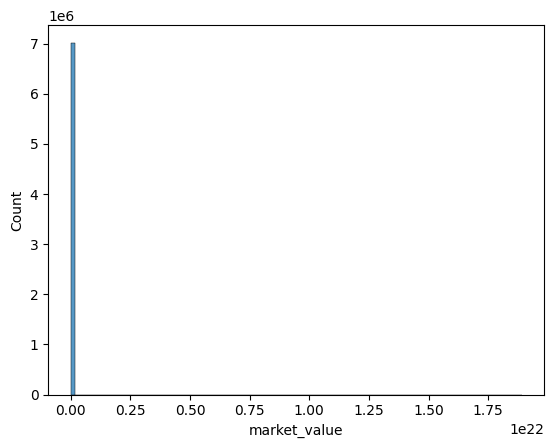

In [55]:
sns.histplot(data = current_market_values["market_value"], bins = 100)
plt.show()

In [57]:
# well.... I guess the most expensive one is too expensive.....
# maybe we can change it to log scale? 
# think I'll drop all the 0 values 
 

In [65]:
market_value_num = current_market_values[["market_value"]]

In [69]:
market_value_num = market_value_num.loc[market_value_num["market_value"] != 0]

In [70]:
market_value_num

,market_value
0,3.000000e+16
1,1.500000e+17
2,1.500000e+17
3,3.000000e+16
4,9.000000e+16
...,...
7020937,4.400000e+17
7020938,3.000000e+17
7020941,9.900000e+17
7020942,2.000000e+17


In [71]:
current_market_values = current_market_values.loc[current_market_values["market_value"] != 0]

In [73]:
current_market_values["log_market_value"] = [ np.log(current_market_values["market_value"]) for i in range(len(current_market_values) )]

MemoryError: Unable to allocate 34.1 MiB for an array with shape (4464622,) and data type float64

In [74]:
# well... or just get a better computer .

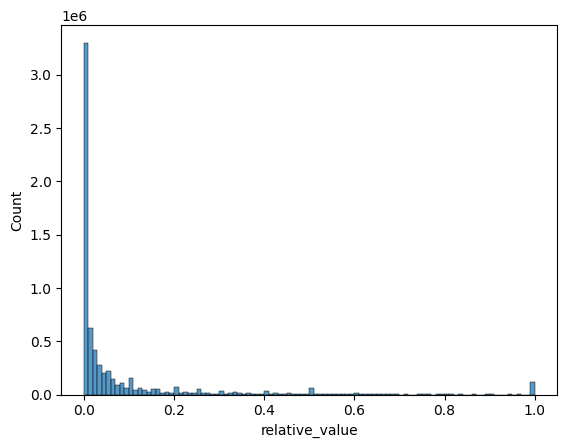

In [75]:
sns.histplot(data = current_market_distribution["relative_value"], bins = 100)
plt.show()

In [76]:
# # it looks like most nfts are still relatively cheap... 
# but there appears to be a substancial amount of NFTS costing a lot.

In [78]:
sns.set_style("dark")

In [79]:
mints = pd.read_sql_query(
    "SELECT * FROM mints"
    ,connection)

In [80]:
mints.head()

,event_id,transaction_hash,block_number,nft_address,token_id,from_address,to_address,transaction_value,timestamp
0,6c6d226e-2096-4b50-ac3f-f7078ca3a0c2,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3223,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
1,263c923f-4db9-4d81-a547-27e1fe5ec405,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5077,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
2,8baa8502-42f9-453e-824a-ad504045c9c5,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5070,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
3,364ee658-ff31-4d0a-a7a7-60d3d7822772,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3757,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
4,58d3adc3-03d2-4e7b-b02c-47957c1f5752,0xd44be17c0298717ce001843069b0a2ca08b577fa2b33...,12936414,0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85,3252202771441387673917605047769619801375983664...,0x0000000000000000000000000000000000000000,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,2.251726e+15,1627776925


In [86]:
# okay we can sort by time stamp 
# and group how many events happened on that day 

mintsOrdered = pd.read_sql_query(
    "SELECT timestamp, COUNT(event_id) AS number_minted \
    FROM mints \
    GROUP BY timestamp \
    ORDER BY timestamp"
    ,connection)

In [87]:
mintsOrdered.head()

,timestamp,number_minted
0,1617235206,2
1,1617235214,4
2,1617235218,2
3,1617235225,1
4,1617235235,2


<AxesSubplot: xlabel='timestamp', ylabel='number_minted'>

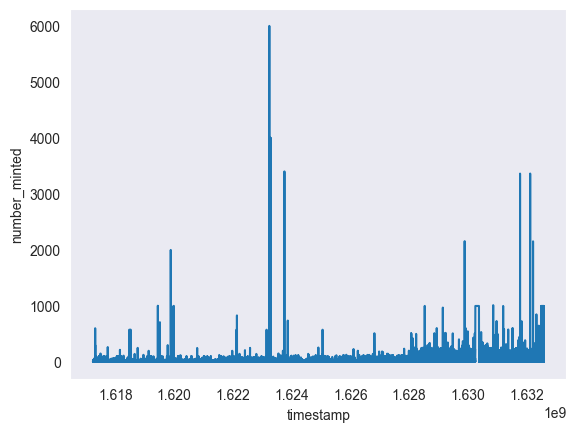

In [88]:
sns.lineplot(data = mintsOrdered, x = "timestamp", y = "number_minted")


In [90]:
# i guess theres just too much data that it looks like a histogram instead...
# but it looks like we can see that its generally steadily increasing with sharp spikes in between